# dependencies

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
import PIL
import PIL.Image

# download dataset

In [2]:
## Loading images and labels
(train_ds, train_labels), (test_ds, test_labels) = tfds.load(
"tf_flowers",
split=["train[:70%]", "train[:30%]"], ## Train test split
batch_size=-1,
as_supervised=True, 
# Include labels
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


# resize images

In [3]:
## Resizing images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

In [4]:
## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

# import pre_prainded model

In [5]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input


## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
base_model.trainable = False ## Not trainable weights


## Preprocessing input
train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)

58889256/58889256 [==============================] - 4s 0us/step


In [6]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

# Add dense layers specific problem

In [7]:
from tensorflow.keras import layers, models
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
base_model,
flatten_layer,
dense_layer_1,
dense_layer_2,
prediction_layer
])

# compile and fit

In [9]:
#Compile and Fit
from tensorflow.keras.callbacks import EarlyStopping
model.compile(
optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True,start_from_epoch=0)
                   
history=model.fit(train_ds, train_labels, epochs=30, validation_split=0.2, batch_size=32, callbacks=None)

Epoch 1/30
65/65 [==============================] - 9s 110ms/step - loss: 1.6373 - accuracy: 0.3713 - val_loss: 1.2792 - val_accuracy: 0.4416
Epoch 2/30
65/65 [==============================] - 5s 80ms/step - loss: 1.2271 - accuracy: 0.5260 - val_loss: 1.1495 - val_accuracy: 0.5467
Epoch 3/30
65/65 [==============================] - 5s 81ms/step - loss: 1.0037 - accuracy: 0.6185 - val_loss: 1.2034 - val_accuracy: 0.5467
Epoch 4/30
65/65 [==============================] - 5s 84ms/step - loss: 0.8968 - accuracy: 0.6808 - val_loss: 1.2138 - val_accuracy: 0.5973
Epoch 5/30
65/65 [==============================] - 5s 85ms/step - loss: 0.7518 - accuracy: 0.7207 - val_loss: 1.0117 - val_accuracy: 0.6187
Epoch 6/30
65/65 [==============================] - 5s 81ms/step - loss: 0.6236 - accuracy: 0.7708 - val_loss: 1.1066 - val_accuracy: 0.6615
Epoch 7/30
65/65 [==============================] - 6s 85ms/step - loss: 0.5084 - accuracy: 0.7971 - val_loss: 1.0571 - val_accuracy: 0.6498
Epoch 8/30
6

# Exercise 1 : (i) Plot the training and validation accuracy 

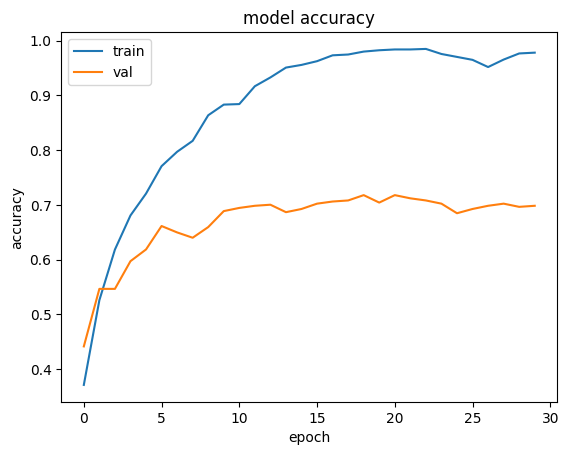

In [10]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

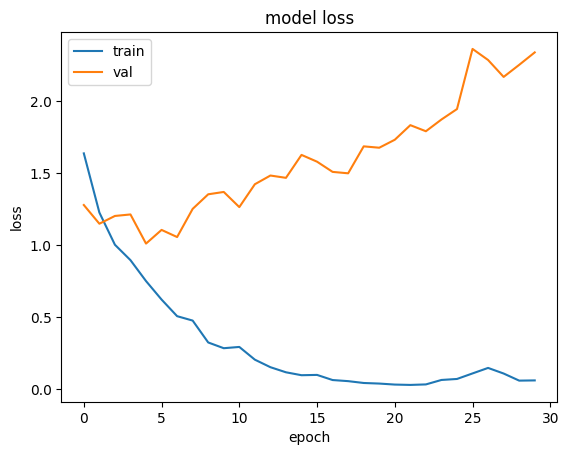

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


## prediction


In [12]:
 #getting predictions on val set.
pred=model.predict(test_ds)
pred_digits=np.argmax(pred,axis=1) #we are making pred as a array of numbers

35/35 [==============================] - 4s 97ms/step


In [33]:
pred.shape

(1101, 5)

In [24]:
pred_digits

array([2, 3, 3, ..., 2, 4, 2])

# make test_labels also array of numbers

In [35]:
test_labels_digits = np.argmax(test_labels,axis=1)

In [36]:
test_labels_digits

array([2, 3, 3, ..., 2, 4, 2])

# (ii)classification report

In [37]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
#y_pred = ann.predict(X_test)
#y_pred_classes = [np.argmax(element) for element in pred]

print("Classification Report: \n", classification_report(test_labels_digits, pred_digits))


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       287
           1       0.98      0.98      0.98       187
           2       0.98      0.99      0.99       238
           3       1.00      0.99      0.99       191
           4       0.99      0.98      0.99       198

    accuracy                           0.99      1101
   macro avg       0.99      0.99      0.99      1101
weighted avg       0.99      0.99      0.99      1101



# (ii) and Confusion matrix 

In [45]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import pandas as pd
import seaborn as sns

In [49]:
cm = confusion_matrix(test_labels_digits, pred_digits)
cm

array([[286,   0,   1,   0,   0],
       [  2, 184,   1,   0,   0],
       [  0,   1, 236,   0,   1],
       [  1,   0,   1, 189,   0],
       [  0,   2,   1,   0, 195]])

In [56]:
cm_df = pd.DataFrame(cm,
                     index= ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'],
                     columns=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'])

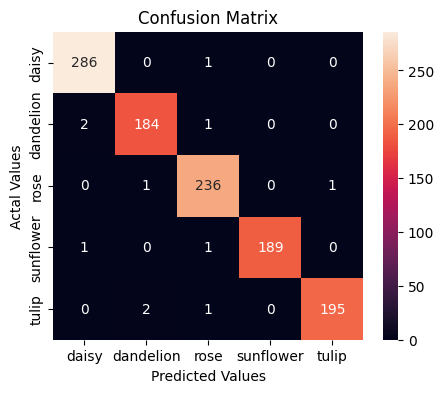

In [58]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, fmt="d",annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()